In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import month_plot, quarter_plot, plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [2]:
# Set the index when we import the data
df = pd.read_csv(r"C:\Users\siddharth\Desktop\Python-Time-Series-Forecasting\Python - Time Series Forecasting\Time Series Analysis\Exponential Smoothing and Holt Winters\weekly_customer_complaints.csv", index_col = "week", parse_dates=True)
df.head()

,complaints,discount_rate,small_commercial_event,medium_commercial_event,big_commercial_event
week,,,,,
2018-01-01,"1,750",37.26%,1,0,0
2018-01-08,"1,701",35.38%,0,0,0
2018-01-15,"1,711",36.22%,1,0,0
2018-01-22,"1,443",38.33%,1,0,0
2018-01-29,"1,397",36.34%,0,0,0


In [3]:
df = df.rename(columns={'complaints':'y'})

In [4]:
df

,y,discount_rate,small_commercial_event,medium_commercial_event,big_commercial_event
week,,,,,
2018-01-01,"1,750",37.26%,1,0,0
2018-01-08,"1,701",35.38%,0,0,0
2018-01-15,"1,711",36.22%,1,0,0
2018-01-22,"1,443",38.33%,1,0,0
2018-01-29,"1,397",36.34%,0,0,0
...,...,...,...,...,...
2022-11-28,"4,444",29.89%,0,1,0
2022-12-05,"4,920",28.48%,1,0,0
2022-12-12,"5,342",28.89%,0,0,0


In [5]:
df['y'] = df['y'].str.replace(',','').astype(int)

<Axes: xlabel='week'>

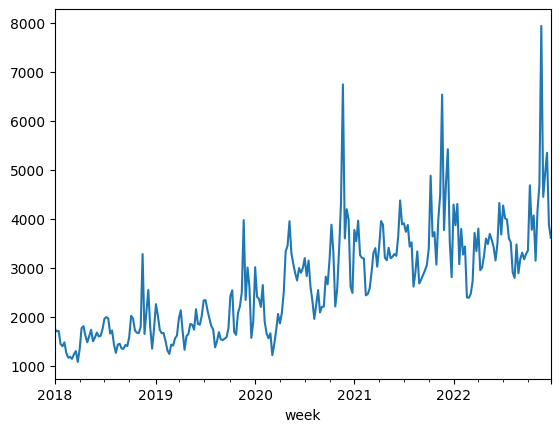

In [6]:
df['y'].plot()

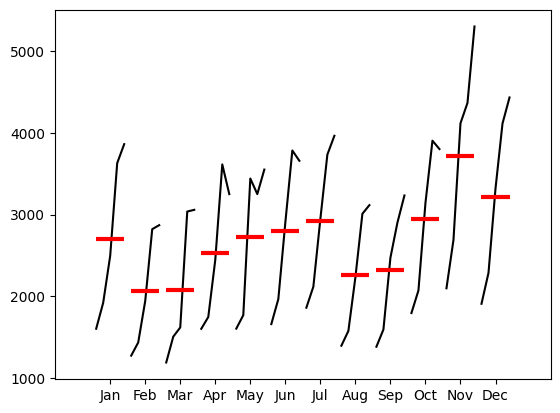

In [7]:
month_plot(df['y'].resample('ME').mean());

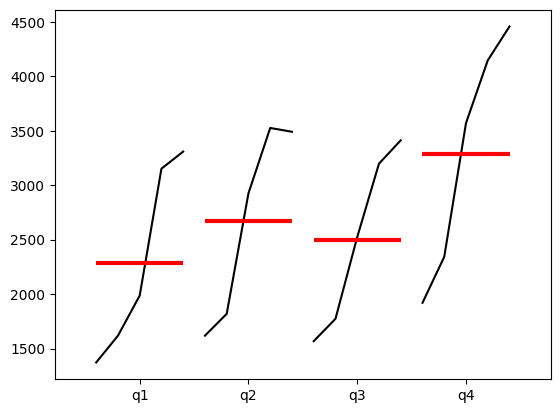

In [8]:
quarter_plot(df['y'].resample('QE').mean());

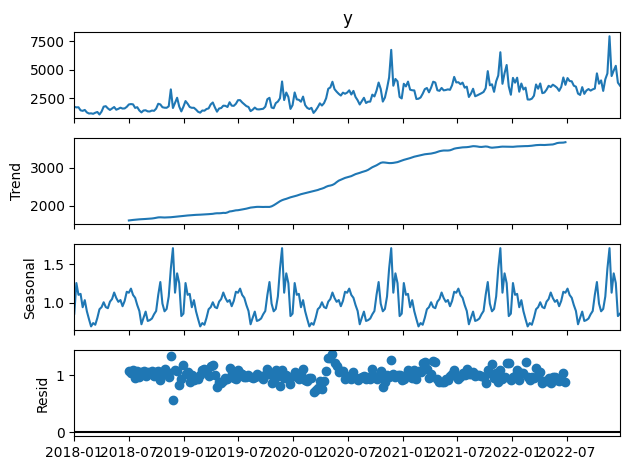

In [9]:
decomposition = seasonal_decompose(
    df['y'], 
    model = 'multiplicative', 
    period=52
)

decomposition.plot();

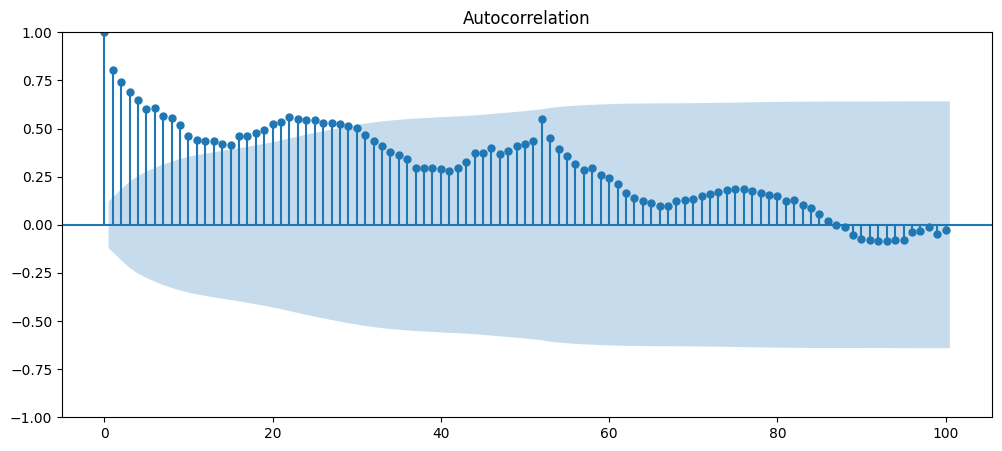

In [10]:
fig, ax = plt.subplots(figsize = (12,5)) 
plot_acf(df['y'], lags=100, ax = ax) 
plt.show()

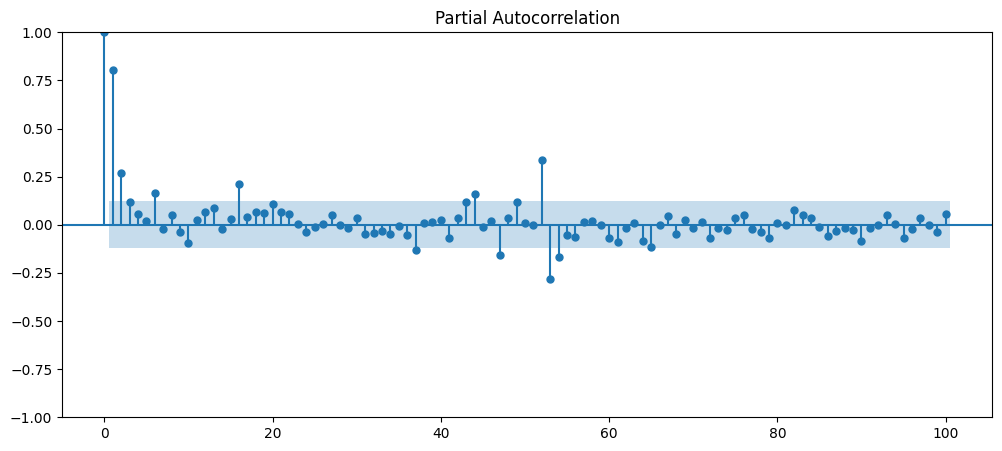

In [11]:
fig, ax = plt.subplots(figsize = (12,5)) 
plot_pacf(df['y'], lags=100, ax = ax) 
plt.show()

In [12]:
df.index

DatetimeIndex(['2018-01-01', '2018-01-08', '2018-01-15', '2018-01-22',
               '2018-01-29', '2018-02-05', '2018-02-12', '2018-02-19',
               '2018-02-26', '2018-03-05',
               ...
               '2022-10-24', '2022-10-31', '2022-11-07', '2022-11-14',
               '2022-11-21', '2022-11-28', '2022-12-05', '2022-12-12',
               '2022-12-19', '2022-12-26'],
              dtype='datetime64[ns]', name='week', length=261, freq=None)

In [13]:
df = df.asfreq('W-Mon') 
df.index 

periods = 13 

In [14]:
train, test = df.iloc[:-periods,0], df.iloc[-periods:,0]

In [15]:
train

week
2018-01-01    1750
2018-01-08    1701
2018-01-15    1711
2018-01-22    1443
2018-01-29    1397
              ... 
2022-08-29    2885
2022-09-05    3177
2022-09-12    3306
2022-09-19    3170
2022-09-26    3279
Freq: W-MON, Name: y, Length: 248, dtype: int64

In [16]:
ses_model = SimpleExpSmoothing(train).fit() 
print(ses_model.summary())

                       SimpleExpSmoothing Model Results                       
Dep. Variable:                      y   No. Observations:                  248
Model:             SimpleExpSmoothing   SSE                       74355648.448
Optimized:                       True   AIC                           3131.513
Trend:                           None   BIC                           3138.540
Seasonal:                        None   AICC                          3131.678
Seasonal Periods:                None   Date:                 Mon, 02 Jun 2025
Box-Cox:                        False   Time:                         18:56:19
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.5115116                alpha                 True
initial_level              1750.0000                

In [17]:
ses_pred = ses_model.forecast(periods)

In [18]:
ses_pred

2022-10-03    3236.834414
2022-10-10    3236.834414
2022-10-17    3236.834414
2022-10-24    3236.834414
2022-10-31    3236.834414
2022-11-07    3236.834414
2022-11-14    3236.834414
2022-11-21    3236.834414
2022-11-28    3236.834414
2022-12-05    3236.834414
2022-12-12    3236.834414
2022-12-19    3236.834414
2022-12-26    3236.834414
Freq: W-MON, dtype: float64

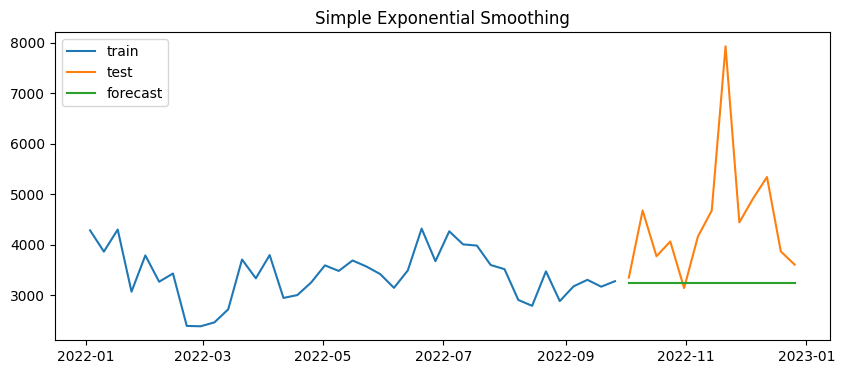

In [19]:
# Set the size of the plot of 10 by 4
plt.figure(figsize = (10, 4))

plt.plot(train.loc['2022':], label = 'train') 
plt.plot(test, label = 'test') 
plt.plot(ses_pred, label = 'forecast')
plt.title('Simple Exponential Smoothing') 
plt.legend() 
plt.show()

In [20]:
model_double = ExponentialSmoothing(
    endog=train, 
    trend='add', 
    seasonal=None
).fit() 

print(model_double.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                        y   No. Observations:                  248
Model:             ExponentialSmoothing   SSE                       75699169.260
Optimized:                         True   AIC                           3139.955
Trend:                         Additive   BIC                           3154.008
Seasonal:                          None   AICC                          3140.303
Seasonal Periods:                  None   Date:                 Mon, 02 Jun 2025
Box-Cox:                          False   Time:                         18:56:19
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.5212796                alpha                 True
smoothing_trend            0.01902

In [21]:
double_pred = model_double.forecast(periods) 
double_pred 

2022-10-03    3234.105279
2022-10-10    3232.692800
2022-10-17    3231.280321
2022-10-24    3229.867843
2022-10-31    3228.455364
2022-11-07    3227.042885
2022-11-14    3225.630407
2022-11-21    3224.217928
2022-11-28    3222.805449
2022-12-05    3221.392970
2022-12-12    3219.980492
2022-12-19    3218.568013
2022-12-26    3217.155534
Freq: W-MON, dtype: float64

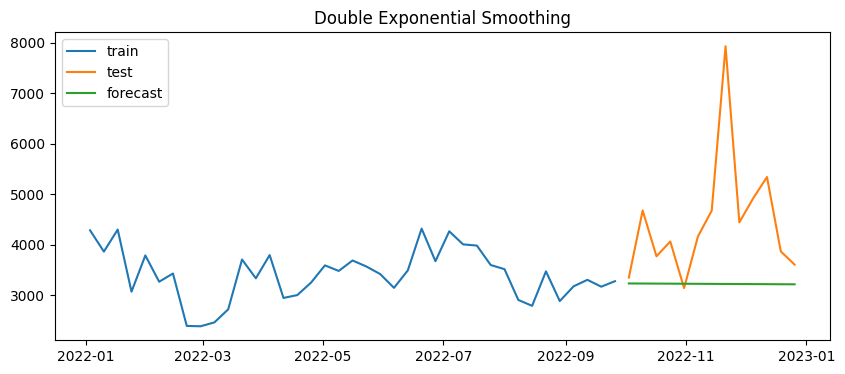

In [22]:
# Set the size of the plot of 10 by 4
plt.figure(figsize = (10, 4))

plt.plot(train.loc['2022':], label = 'train') 
plt.plot(test, label = 'test') 
plt.plot(double_pred, label = 'forecast')
plt.title('Double Exponential Smoothing') 
plt.legend() 
plt.show()

In [23]:
model_holt = ExponentialSmoothing(
    endog=train, 
    trend='mul', 
    seasonal='mul', 
    seasonal_periods=52
).fit()

c:\Work\MLOps\flask_env\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
c:\Work\MLOps\flask_env\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [24]:
holt_pred = model_holt.forecast(periods) 
holt_pred 

2022-10-03    4107.590962
2022-10-10    5076.181936
2022-10-17    3975.352125
2022-10-24    3553.483179
2022-10-31    3455.745058
2022-11-07    4334.712993
2022-11-14    5475.016939
2022-11-21    7339.122989
2022-11-28    4411.420504
2022-12-05    5392.895016
2022-12-12    5347.471098
2022-12-19    3637.128302
2022-12-26    3406.943920
Freq: W-MON, dtype: float64

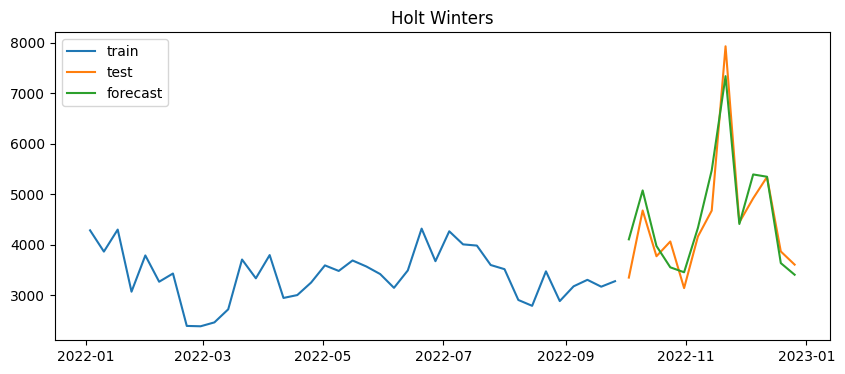

In [25]:
# Set the size of the plot of 10 by 4
plt.figure(figsize = (10, 4))

plt.plot(train.loc['2022':], label = 'train') 
plt.plot(test, label = 'test') 
plt.plot(holt_pred, label = 'forecast')
plt.title('Holt Winters') 
plt.legend() 
plt.show()

In [26]:
rmse = root_mean_squared_error(test, holt_pred) 
mae = mean_absolute_error(test, holt_pred) 
mape = mean_absolute_percentage_error(test, holt_pred) 

print(f"RMSE: {rmse:.0f}")
print(f"MAE: {mae:.0f}")
print(f"MAPE: {100 * mape:.1f} %")

RMSE: 436
MAE: 360
MAPE: 8.4 %


In [27]:
def model_assessment(train, test, predictions, chart_title=None):
    # Set the size of the plot of 10 by 4
    plt.figure(figsize = (10, 4))

    plt.plot(train.loc['2022':], label = 'train') 
    plt.plot(test, label = 'test') 
    plt.plot(predictions, label = 'forecast')
    plt.title(chart_title) 
    plt.legend() 
    plt.show()

    rmse = root_mean_squared_error(test, predictions) 
    mae = mean_absolute_error(test, predictions) 
    mape = mean_absolute_percentage_error(test, predictions) 

    print(f"RMSE: {rmse:.0f}")
    print(f"MAE: {mae:.0f}")
    print(f"MAPE: {100 * mape:.1f} %")
    

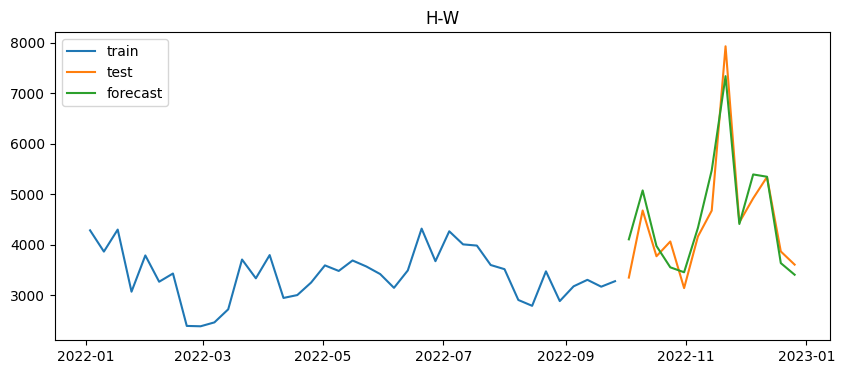

RMSE: 436
MAE: 360
MAPE: 8.4 %


In [28]:
model_assessment(train.loc['2022':], test, holt_pred, 'H-W')

In [29]:
model_holt_complete = ExponentialSmoothing(
    endog=df['y'], 
    trend='add', 
    seasonal='mul', 
    seasonal_periods=52
).fit()

In [30]:
forecast = model_holt_complete.forecast(13) 
forecast 

2023-01-02    4837.393872
2023-01-09    4367.554927
2023-01-16    4577.110340
2023-01-23    3718.420269
2023-01-30    4134.549716
2023-02-06    3627.328782
2023-02-13    3293.123278
2023-02-20    2795.305309
2023-02-27    2886.388812
2023-03-06    2950.441106
2023-03-13    3324.831619
2023-03-20    3806.124334
2023-03-27    3679.920595
Freq: W-MON, dtype: float64

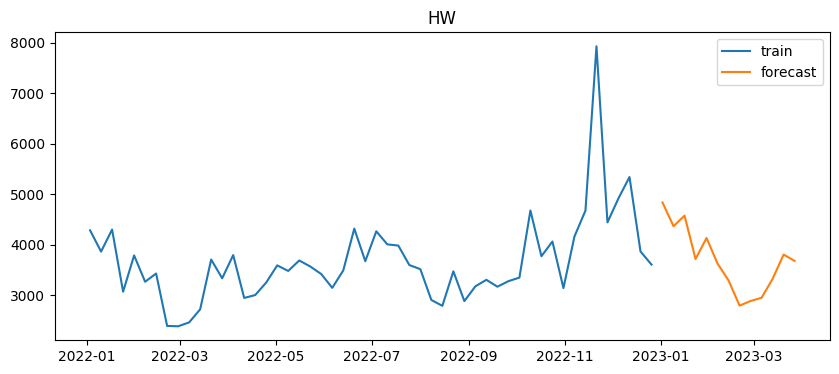

In [31]:
def plot_future(y, forecast, chart_title = None):
  """
  Plots the historical data and future forecasts on the same axis.
  """

  plt.figure(figsize=(10,4)) 
  plt.plot(y, label = 'train') 
  plt.plot(forecast, label = 'forecast')
  plt.title(chart_title) 
  plt.legend() 
  plt.show() 

plot_future(df.y.loc['2022':], forecast,'HW')

In [32]:
df_daily = pd.read_csv(r'C:\Users\siddharth\Desktop\Python-Time-Series-Forecasting\Python - Time Series Forecasting\Time Series Analysis\Exponential Smoothing and Holt Winters\bitcoin_price.csv', index_col='Date', parse_dates=True)['Adj Close'].rename('y') 


In [33]:
df_daily = df_daily.asfreq('D')

In [34]:
df_daily.index

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20',
               '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26',
               ...
               '2023-12-21', '2023-12-22', '2023-12-23', '2023-12-24',
               '2023-12-25', '2023-12-26', '2023-12-27', '2023-12-28',
               '2023-12-29', '2023-12-30'],
              dtype='datetime64[ns]', name='Date', length=3392, freq='D')

In [35]:
periods = 30 
train, test = df_daily.iloc[:-periods], df_daily.iloc[-periods:] 


In [36]:
model_daily = ExponentialSmoothing(
    endog=train, 
    trend='mul', 
    seasonal='mul', 
    seasonal_periods=365
).fit()

c:\Work\MLOps\flask_env\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


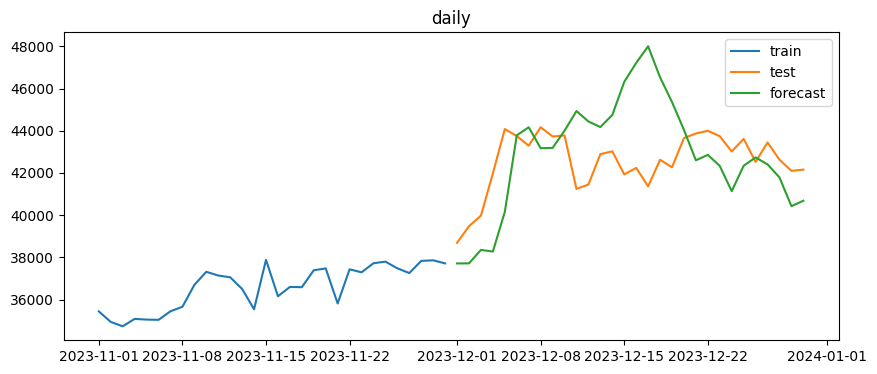

RMSE: 2549
MAE: 1998
MAPE: 4.7 %


In [37]:
daily_pred = model_daily.forecast(periods) 

model_assessment(train.loc["2023-11"], test, daily_pred, 'daily')

In [38]:
### Holt Winters Project 

In [1]:
# Importing essential libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import month_plot, quarter_plot, plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [2]:
df = pd.read_csv(r'C:\Users\siddharth\Desktop\Python-Time-Series-Forecasting\Python - Time Series Forecasting\Time Series Analysis\CAPSTONE PROJECT - Airmiles\airmiles.csv')

In [3]:
df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")
df = df.set_index('Date')

In [4]:
df = df.asfreq('MS')

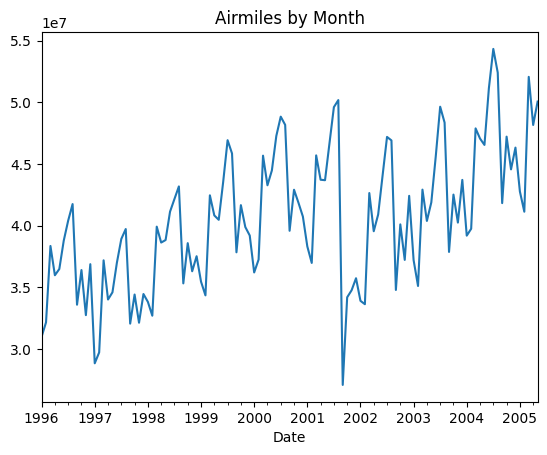

In [5]:
df['airmiles'].plot(title='Airmiles by Month');

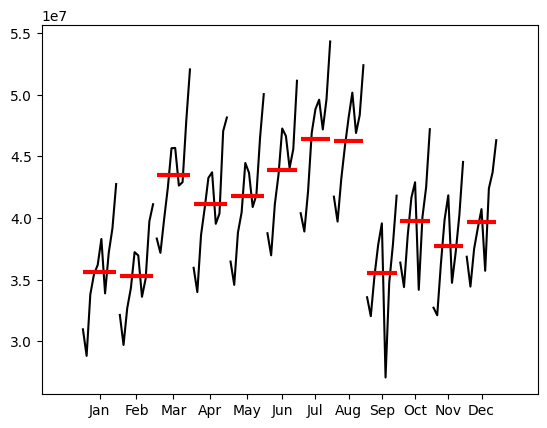

In [6]:
month_plot(df['airmiles'].resample('MS').mean());

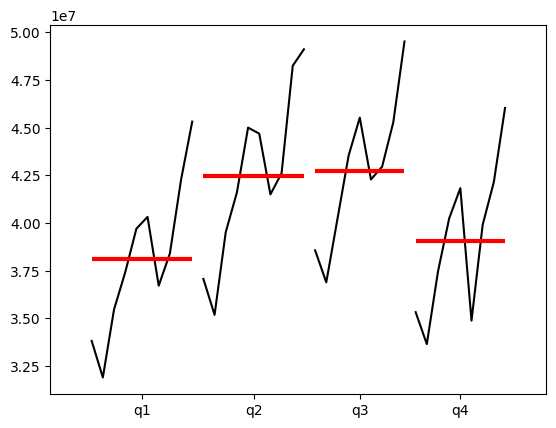

In [7]:
quarter_plot(df['airmiles'].resample('QS').mean());

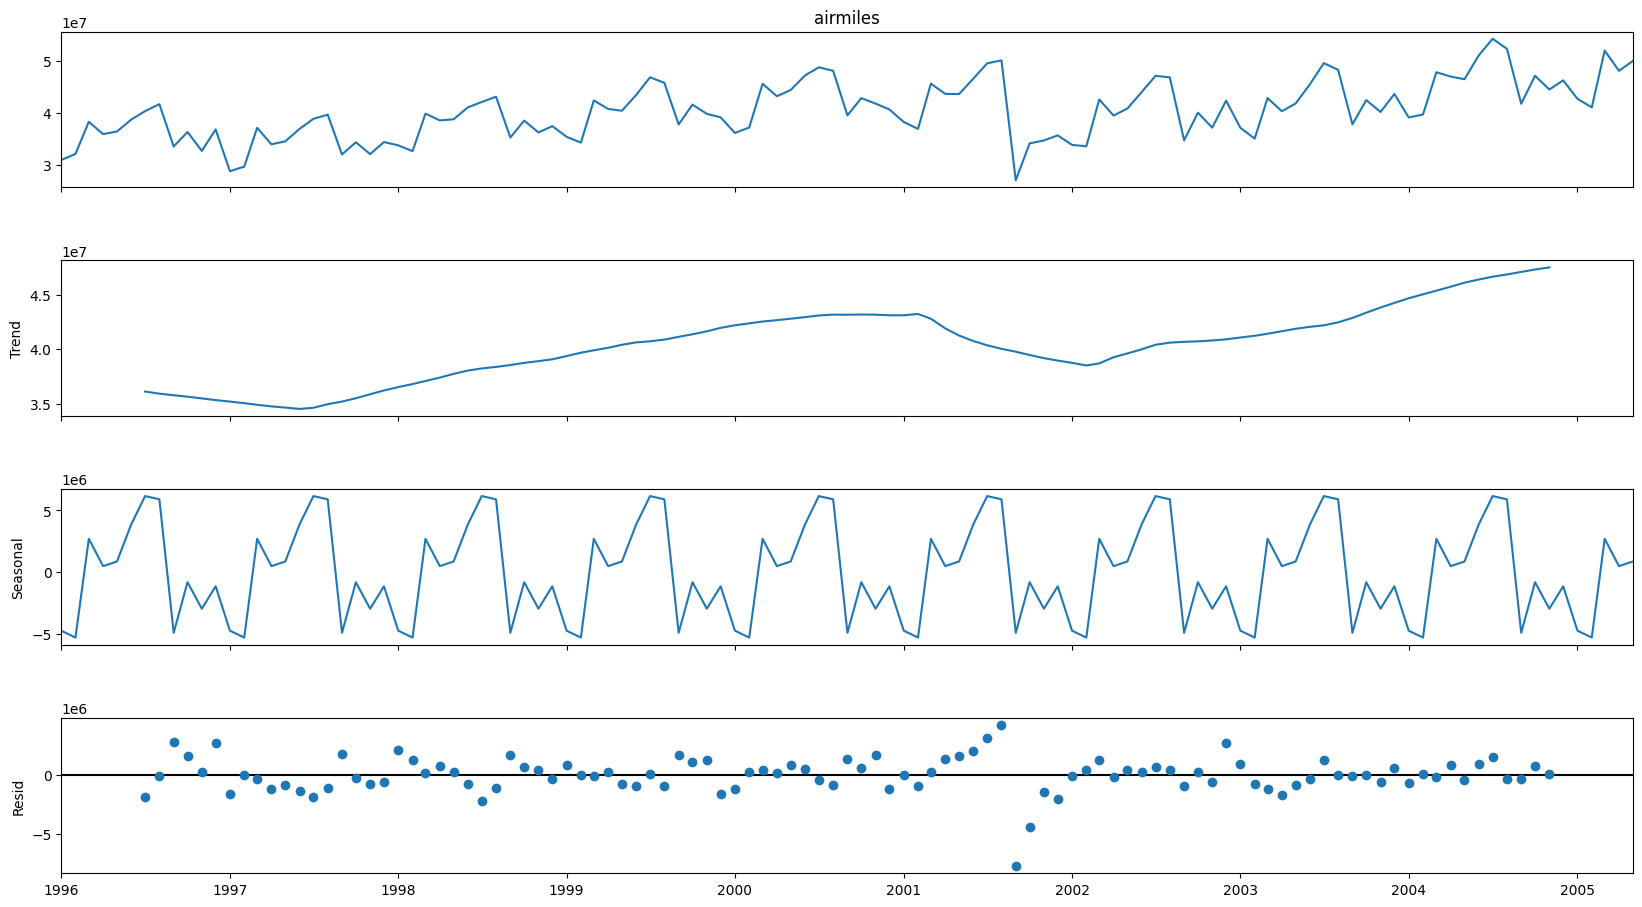

In [8]:
decomposition = seasonal_decompose(df['airmiles'], model='additive', period=12)
fig = decomposition.plot()
fig.set_size_inches(18, 10)
plt.show()

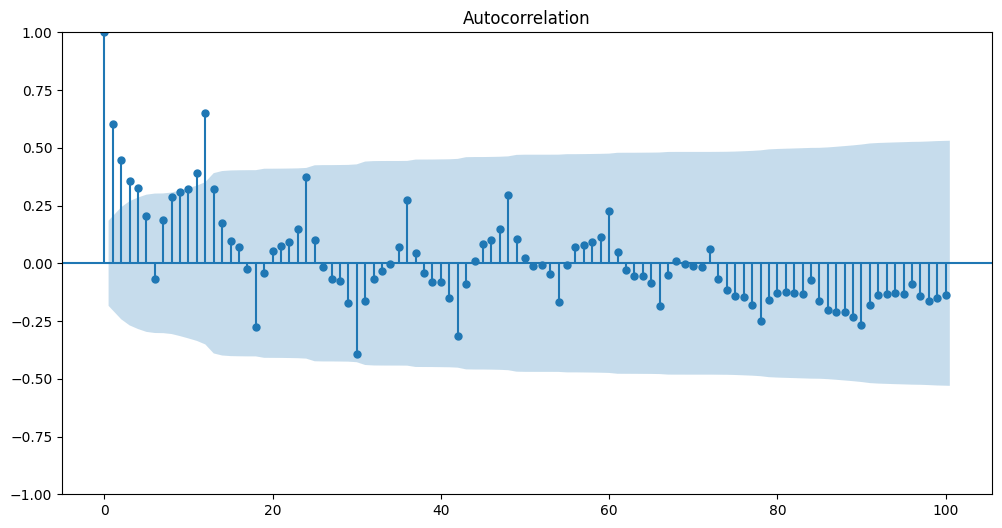

In [9]:
fig, ax = plt.subplots(figsize = (12,6)) 
plot_acf(df['airmiles'], lags=100, ax = ax) 
plt.show()

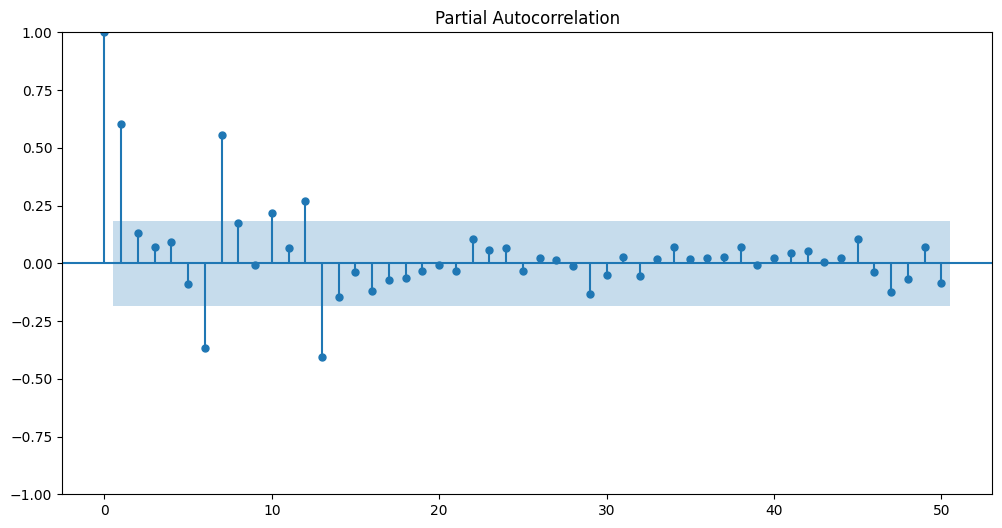

In [10]:
fig, ax = plt.subplots(figsize = (12,6)) 
plot_pacf(df['airmiles'], lags=50, ax = ax) 
plt.show()

In [11]:
periods = 12 

train = df[:-periods]['airmiles'] 
test = df[-periods:]['airmiles']

In [12]:
model = ExponentialSmoothing(endog=train, trend='add', seasonal='add', seasonal_periods=12).fit() 
print(model.summary())

                        ExponentialSmoothing Model Results                       
Dep. Variable:                 airmiles   No. Observations:                   101
Model:             ExponentialSmoothing   SSE                 365624025475434.688
Optimized:                         True   AIC                            2952.668
Trend:                         Additive   BIC                            2994.510
Seasonal:                      Additive   AICC                           2961.010
Seasonal Periods:                    12   Date:                  Mon, 02 Jun 2025
Box-Cox:                          False   Time:                          20:04:05
Box-Cox Coeff.:                    None                                          
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.5353571                alpha                 True
smoothing_trend 

c:\Work\MLOps\flask_env\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [13]:
holt_pred = model.forecast(periods)
holt_pred 

2004-06-01    4.946702e+07
2004-07-01    5.167300e+07
2004-08-01    5.123395e+07
2004-09-01    4.070714e+07
2004-10-01    4.578311e+07
2004-11-01    4.398171e+07
2004-12-01    4.594294e+07
2005-01-01    4.216928e+07
2005-02-01    4.178872e+07
2005-03-01    4.985587e+07
2005-04-01    4.768199e+07
2005-05-01    4.809407e+07
Freq: MS, dtype: float64

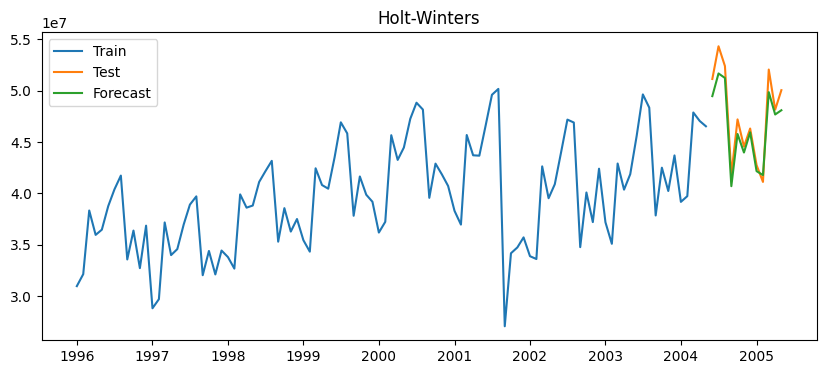

In [14]:
# Plot the Train, Test and Forecast
plt.figure(figsize = (10, 4))

# Plot the train, test and forecast
plt.plot(train, label = "Train")
plt.plot(test, label = "Test")
plt.plot(holt_pred, label = "Forecast")

# Add a title and legend to the plot
plt.title("Holt-Winters")
plt.legend()
plt.show()

In [15]:
# Evaluate the forecast using RMSE, MAE, MAPE
rmse = root_mean_squared_error(test, holt_pred)
mae = mean_absolute_error(test, holt_pred)
mape = mean_absolute_percentage_error(test, holt_pred)
print(f"RMSE: {rmse:.0f}")
print(f"MAE: {mae:.0f}")
print(f"MAPE: {100 * mape:.1f} %")

RMSE: 1428833
MAE: 1235753
MAPE: 2.5 %


In [26]:
# predict the future


model_complete = ExponentialSmoothing(
    endog=df["airmiles"], trend="add", seasonal="add", seasonal_periods=12
).fit()

c:\Work\MLOps\flask_env\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [29]:
forecast = model_complete.forecast(periods)

In [30]:
def plot_future(y, forecast, chart_title = None):
  """
  Plots the historical data and future forecasts on the same axis.
  """

  # Plot the training data and forecast
  plt.figure(figsize = (10, 4))

  # Plot the train, test and forecast
  plt.plot(y, label = "Train")
  plt.plot(forecast, label = "Forecast")

  # Add a title and legend to the plot
  plt.title(chart_title)
  plt.legend()
  plt.show()

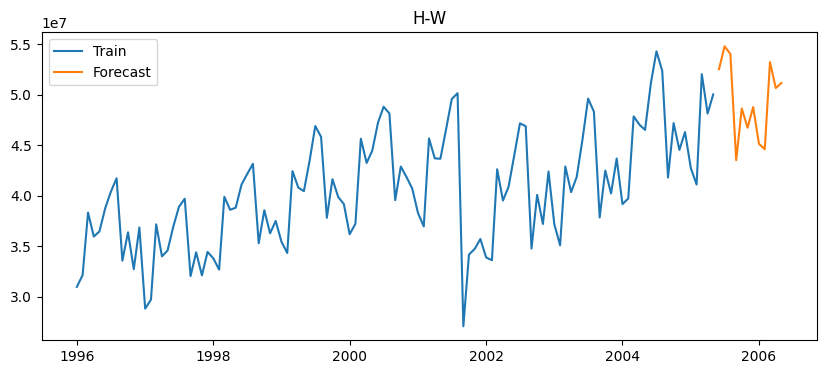

In [32]:
plot_future(df['airmiles'], forecast,'H-W')